In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data  = data.values

In [5]:
X = data[:,1:]
Y = data[:,0]

In [6]:
X.shape , Y.shape

((42000, 784), (42000,))

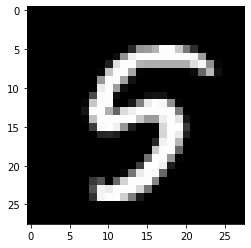

1


In [7]:
def draw(image):
    img = image.reshape([28,28])
    plt.imshow(img , cmap="gray")
    plt.show()

draw(X[8])
print(Y[0])

In [8]:
split = int(X.shape[0]*0.9)
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

In [9]:
int(X.shape[0]*0.8)

33600

In [10]:
X_train.shape , X_test.shape

((37800, 784), (4200, 784))

In [11]:

def distance(x1 , x2):
    return np.sqrt(sum((x1-x2)**2))

In [12]:
def KNN(X, Y , query,k=7):
    vals = []
    m = X.shape[0]

    #step 1
    for i in range(m):
        dist = distance(query , X[i])
        vals.append([dist,Y[i]])

    #step 2
    vals = sorted(vals)

    #step 3
    vals = vals[:k]
    vals = np.array(vals)

    #step 4
    new_val = np.unique(vals[:,1] , return_counts = True)

    index = new_val[1].argmax()
#     print(new_val[0][index])
    return new_val[0][index]

In [13]:
i=600
pred = KNN(X_train , Y_train , X_test[i] ,k = 21)
print(pred)
print(Y_test[i])

1.0
1


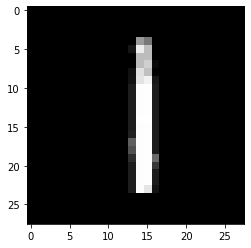

In [14]:
draw(X_test[i])


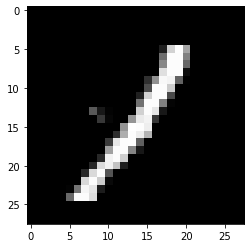

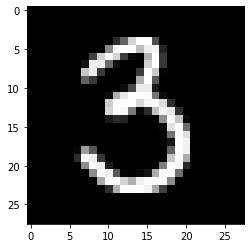

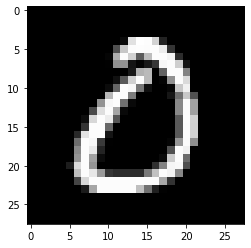

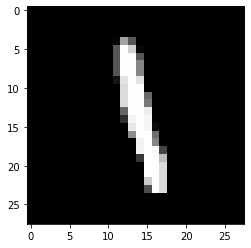

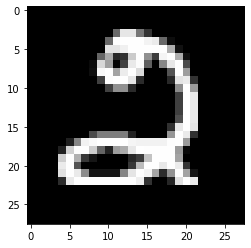

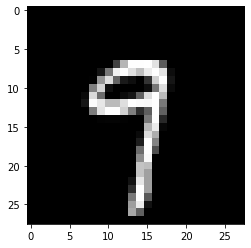

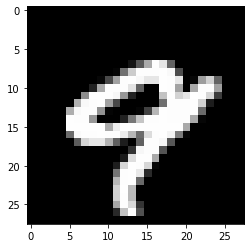

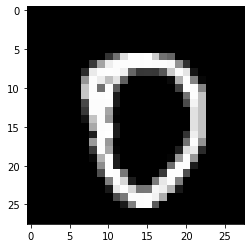

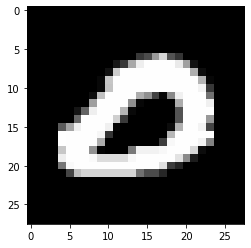

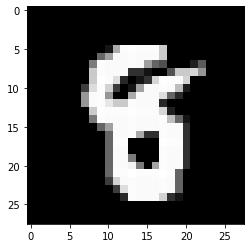

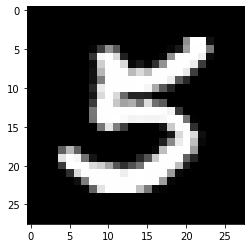

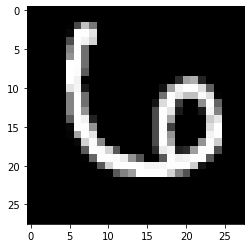

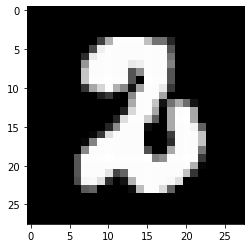

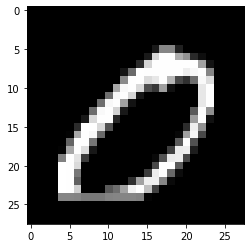

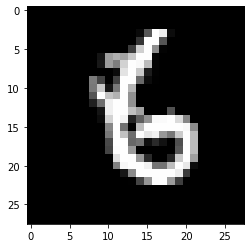

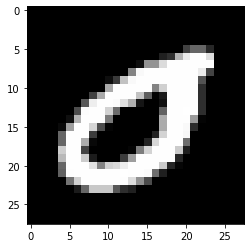

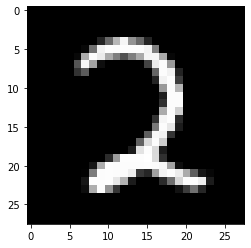

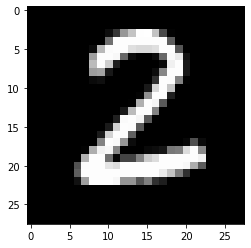

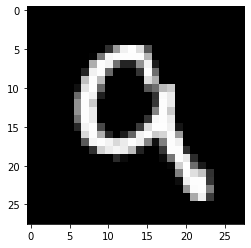

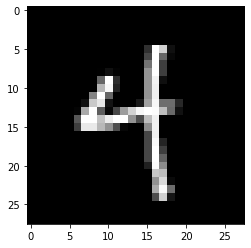

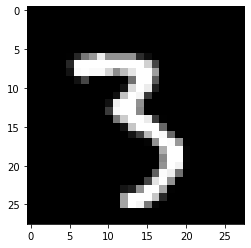

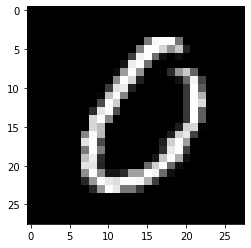

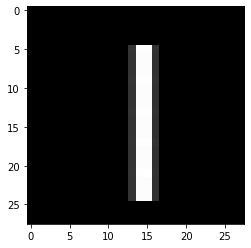

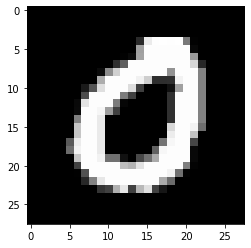

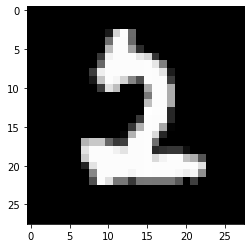

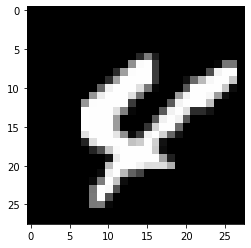

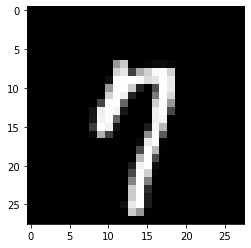

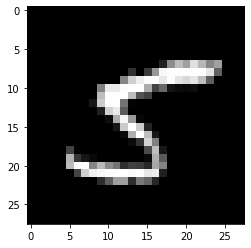

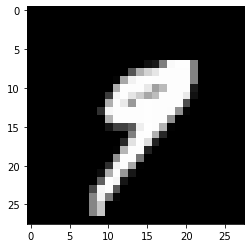

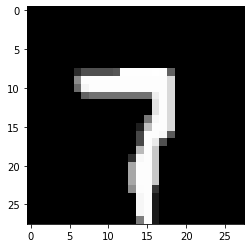

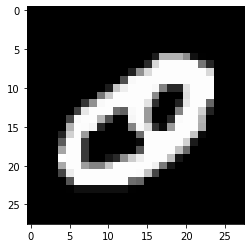

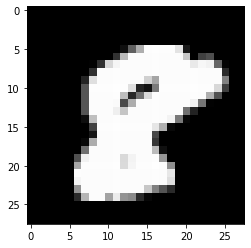

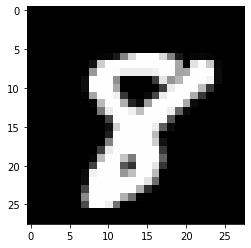

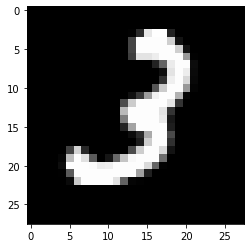

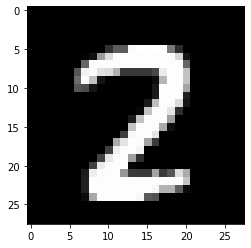

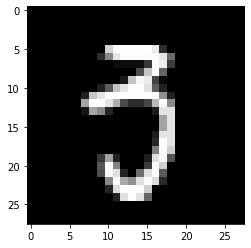

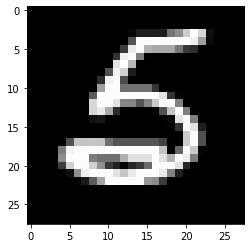

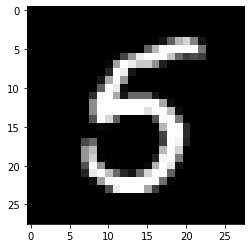

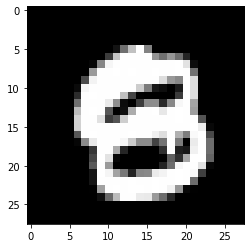

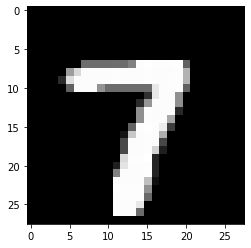

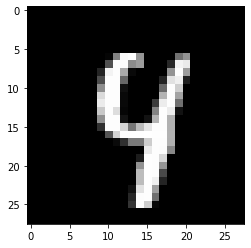

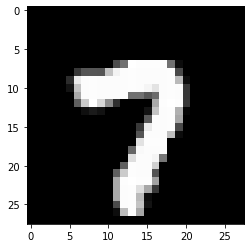

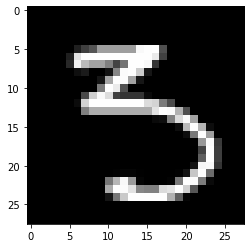

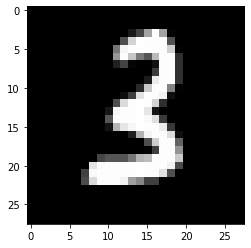

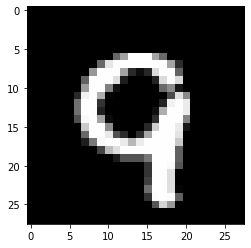

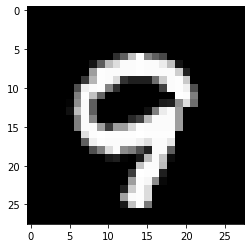

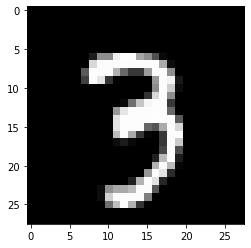

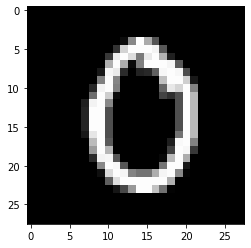

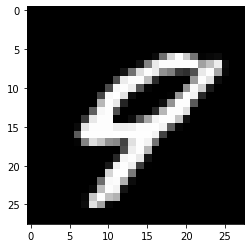

0.98


In [15]:
m = 50
count = 0
for i in range(m):
    if KNN(X_train , Y_train , X_test[i+10] , k=21)==Y_test[i+10]:
        count+=1
        draw(X_test[i+10])
print(count/m)